# <center> Домашнее задание 5</center>

**1. [15 баллов]** Изучите [набор данных](https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset) по сотрудникам одной крупной IT компании. Посмотрите на описательные статистики по всем столбцам (как по количественным, так и по порядковым и категориалным переменным). В переменной ```JobSatisfaction``` приведите значения к бинарному виду. Значения $1$ и $2$ должны стать нулями, а значения от $3$ до $4$ - единицами. 

**2. [20 баллов]** Отберите N признаков (подвыборку наиболее важных, на ваш взгляд, признаков или все имеющиеся) и постройте модель логистической регрессии с k-fold кросс-валидацией ($k=5$) и $L_2$ регуляризацией, где в качестве целевой переменной будем предсказывать удовлетворенность работой по преобразованной переменной ```JobSatisfaction``` ($0$ - неудовлетворенность, $1$ - удовлетворенность). Напишите, какой это тип задачи машинного обучения (регрессия, кластеризация или что-то другое). Проинтерпретируйте полученные коэффициенты обученной модели. 

**3. [20 баллов]** Постройте дерево решений на всех признаках, используя энтропийный критерий, и визуализируйте его через библиотеку graphviz (или sklearn.export_graphiz и импорт изображения). Проинтерпретируйте, через какие предикаты в дереве (логические выражения признаков и их значений) Вы получили предсказания положительного класса (для всех листьев с предсказанием $1$).

**4. [20 баллов]** Обучите случайный лес и подберите к нему параметры ```n_estimators, max_depth, min_samples_leaf, max_features```, используя ```GridSearchCV``` или ```RandomizedSearchCV```.

**5. [25 баллов]** Создайте предсказания для вашей выборки, имитируя константный (всегда предсказывающий метку класса 1) и случайный (для каждого наблюдения равновероятно предсказывающий метки класса $1$ или $0$) классификаторы. Постройте ROC кривые для логистической регрессии, дерева решений, случайного леса, константного и случайного классификаторов на одном графике и сделайте выводы о качестве полученных моделей. Для лучшей (по метрике AUC) модели посчитайте матрицу ошибок, Accuracy, Precision и Recall. 

* **Бонусное [30 баллов]** Придумайте 10 новых признаков на основе имеющихся и при построении модели покажите, что суммарно они улучшают качество вашей лучшей модели хотя бы на 3% (по метрике AUC).

# 1

In [19]:
import pandas as pd

In [20]:
data = pd.read_csv("data.csv")
data.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0


In [21]:
data["JobSatisfaction"] = data["JobSatisfaction"] // 3

In [22]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [23]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [24]:
df = data[["DistanceFromHome", "RelationshipSatisfaction", "WorkLifeBalance", "YearsSinceLastPromotion",
      "DailyRate", 'HourlyRate', 'OverTime', 'StandardHours']]

In [25]:
df["OverTime"] = df["OverTime"].replace("Yes", "1").replace("No", 0)
df

<ipython-input-25-cce6088a124a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["OverTime"] = df["OverTime"].replace("Yes", "1").replace("No", 0)


,DistanceFromHome,RelationshipSatisfaction,WorkLifeBalance,YearsSinceLastPromotion,DailyRate,HourlyRate,OverTime,StandardHours
0,1,1,1,0,1102,94,1,80
1,8,4,3,1,279,61,0,80
2,2,2,3,0,1373,92,1,80
3,3,3,3,3,1392,56,1,80
4,2,4,3,2,591,40,0,80
...,...,...,...,...,...,...,...,...
1465,23,3,3,0,884,41,0,80
1466,6,1,3,1,613,42,0,80
1467,4,2,3,0,155,87,1,80
1468,2,4,2,0,1023,63,0,80


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import StandardScaler

In [27]:
X = StandardScaler().fit_transform(df)
y = data.JobSatisfaction

In [28]:
clf = LogisticRegression()

In [32]:
clf.fit(X, y).coef_

array([[ 0.01287061, -0.03283723, -0.01385245, -0.03438494,  0.10458191,
        -0.14519526,  0.04989859,  0.        ]])

In [ ]:
Наиболее важный параметр который положительно влияет на JobSatisfaction это DailyRate и Overtime

In [33]:
y_pred = clf.predict(X)

In [34]:
y

0       1
1       0
2       1
3       1
4       0
       ..
1465    1
1466    0
1467    0
1468    0
1469    1
Name: JobSatisfaction, Length: 1470, dtype: int64

In [35]:
res = pd.DataFrame({"pred": y_pred, "true": y})

In [36]:
res["right"] = res.pred == res.true

In [37]:
res.right.value_counts(normalize=True)

True     0.612245
False    0.387755
Name: right, dtype: float64

In [40]:
res

,pred,true,right
0,1,1,True
1,1,0,False
2,1,1,True
3,1,1,True
4,1,0,False
...,...,...,...
1465,1,1,True
1466,1,0,False
1467,1,0,False
1468,1,0,False


In [41]:
cv = cross_validate(clf, X, y)

{'fit_time': array([0.00702977, 0.00598407, 0.00598359, 0.00698161, 0.00804186]),
 'score_time': array([0.00098395, 0.0009973 , 0.00099778, 0.0009973 , 0.00099802]),
 'test_score': array([0.60884354, 0.6122449 , 0.60544218, 0.60884354, 0.6122449 ])}

In [39]:
cv["test_score"].mean()

0.6095238095238095

# 3

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
nX = data.drop("JobSatisfaction", axis=1)
ny = data.JobSatisfaction

In [25]:
nX = pd.get_dummies(nX)

In [26]:
tree_clf = DecisionTreeClassifier(criterion="entropy")

In [27]:
tree_clf.fit(nX, ny)

DecisionTreeClassifier(criterion='entropy')

In [28]:
tree_clf.predict(nX)

array([1, 0, 1, ..., 0, 0, 1], dtype=int64)

In [29]:
from sklearn.metrics import accuracy_score

accuracy_score(ny, tree_clf.predict(nX))

1.0

In [47]:
from sklearn.tree import export_graphviz
from graphviz import Source
from sklearn import tree

Source(export_graphviz(tree_clf, feature_names=nX.columns))

ModuleNotFoundError: No module named 'graphviz'

# 4

In [93]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [96]:
params = {"n_estimators": [i for i in range(5, 15)],
          "max_depth":  [i for i in range(10, 15)],
          "min_samples_leaf": [i for i in range(1, 5)],
          "max_features": [i for i in range(1, 5)]}


f = RandomForestClassifier()
grid = GridSearchCV(estimator=f, param_grid=params)

In [97]:
grid.fit(nX, ny)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [99]:
best = grid.best_estimator_

In [100]:
accuracy_score(ny, best.predict(nX))

0.9891156462585035

In [107]:
res.columns

Index(['pred', 'true', 'right'], dtype='object')

In [110]:
TP = len((res[(res["pred"] == 1) & (res["true"] == 1)]))
FP = len((res[(res["pred"] == 1) & (res["true"] == 0)]))
FN = len((res[(res["pred"] == 0) & (res["true"] == 1)]))

In [111]:
TP / (TP + FP)

0.6218727662616155

In [112]:
TP / (TP + FN)

0.9655937846836848

In [113]:
from sklearn.metrics import roc_curve

In [114]:
roc_curve(ny, best.predict(nX))

(array([0.        , 0.02460457, 1.        ]),
 array([0.        , 0.99778024, 1.        ]),
 array([2, 1, 0]))

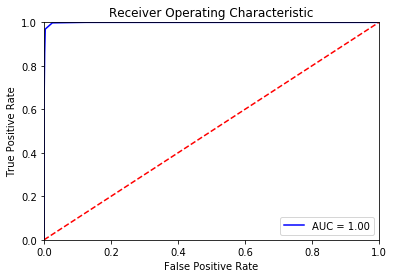

ModuleNotFoundError: No module named 'ggplot'

In [116]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = best.predict_proba(nX)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(ny, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# method II: ggplot
from ggplot import *
df = pd.DataFrame(dict(fpr = fpr, tpr = tpr))
ggplot(df, aes(x = 'fpr', y = 'tpr')) + geom_line() + geom_abline(linetype = 'dashed')

In [117]:
from sklearn.metrics import confusion_matrix

confusion_matrix(ny, best.predict(nX))

array([[555,  14],
       [  2, 899]])